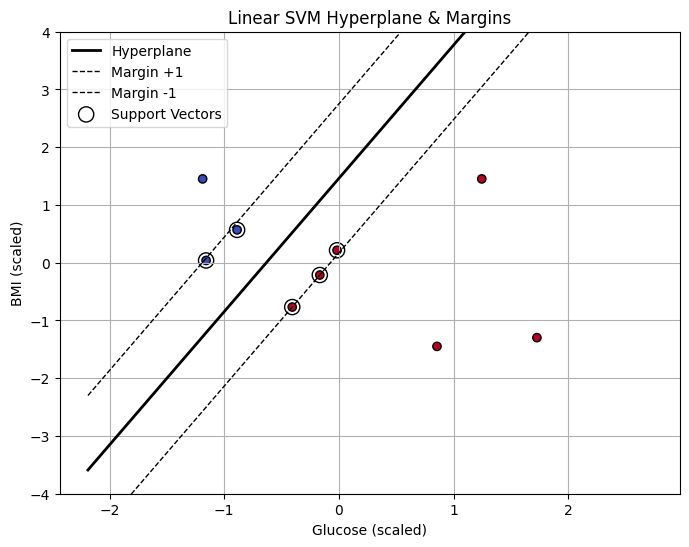

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

df = pd.read_csv("data_diabet.csv")

# 2 fitur (gula darah dan bb ideal)
X = df[["Glucose", "BMI"]].values
y = df["Outcome"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train SVM Linear
model = SVC(kernel="linear", C=1.0)
model.fit(X_scaled, y)

#parameter hyperplane
w = model.coef_[0]
b = model.intercept_[0]

#visualisasi
x_min, x_max = X_scaled[:,0].min()-1, X_scaled[:,0].max()+1
xx = np.linspace(x_min, x_max, 300)

#Persamaan garis
yy_hyperplane = -(w[0] * xx + b) / w[1]
yy_margin_pos = -(w[0]*xx + b - 1) / w[1]
yy_margin_neg = -(w[0]*xx + b + 1) / w[1]

plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap="coolwarm", edgecolor="k")

plt.plot(xx, yy_hyperplane, 'k-', linewidth=2, label="Hyperplane")
plt.plot(xx, yy_margin_pos, 'k--', linewidth=1, label="Margin +1")
plt.plot(xx, yy_margin_neg, 'k--', linewidth=1, label="Margin -1")

plt.scatter(model.support_vectors_[:,0],
            model.support_vectors_[:,1],
            s=120, facecolors='none', edgecolors='k',
            label="Support Vectors")

plt.ylim(-4, 4)

plt.xlabel("Glucose (scaled)")
plt.ylabel("BMI (scaled)")
plt.title("Linear SVM Hyperplane & Margins")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(df["BMI"].describe())
print(df["BMI"].head())


count    100.000000
mean      33.745000
std       10.890246
min       15.400000
25%       24.950000
50%       34.800000
75%       42.875000
max       49.800000
Name: BMI, dtype: float64
0    48.3
1    48.3
2    35.1
3    37.1
4    30.7
Name: BMI, dtype: float64


In [ ]:
print("w =", w)
print("b =", b)


w = [ 1.78937117 -0.77543513]
b = 1.1336153381746479


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,83,63,10,251,48.3,1.104,64,0
1,3,164,108,39,286,48.3,2.339,39,1
2,12,117,109,45,203,35.1,2.179,64,1
3,14,84,50,41,206,37.1,0.209,47,0
4,10,109,55,28,83,30.7,0.163,60,1


Prediksi pertama 10 data: [-1.  1.  1. -1.  1.  1.  1.  1. -1.]
Akurasi manual: 1.0


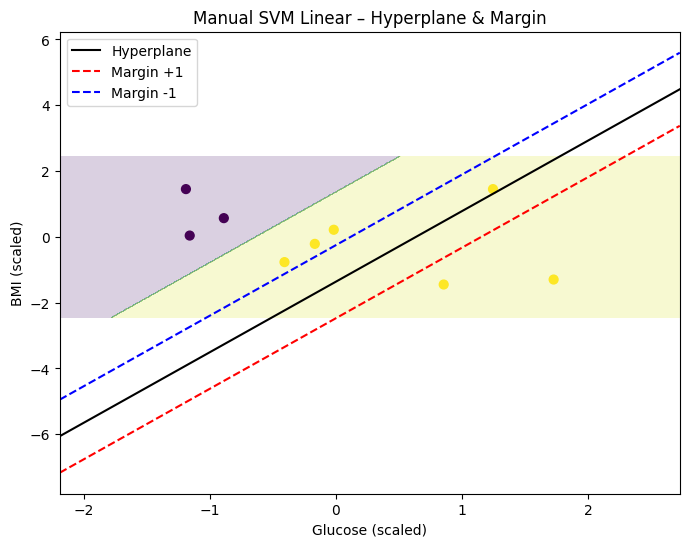

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 1. Implementasi SVM Linear Manual (Hinge Loss + Gradient Descent)
class ManualLinearSVM:

    def __init__(self, lr=0.001, lambda_param=0.01, n_iters=2000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Convert label 0 → -1
        y_ = np.where(y == 0, -1, 1)

        # Initialize weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                # Jika memenuhi margin
                if condition:
                    dw = 2 * self.lambda_param * self.w
                    db = 0
                else:
                    # Jika melanggar margin → hinge loss aktif
                    dw = 2 * self.lambda_param * self.w - y_[idx] * x_i
                    db = -y_[idx]

                # update weight
                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)


# 2. Load Data (Gunakan hanya dua fitur untuk visualisasi)
df = pd.read_csv("/content/data_diabet.csv")

X = df[["Glucose", "BMI"]].values
y = df["Outcome"].values

# Normalisasi agar training stabil
X = (X - X.mean(axis=0)) / X.std(axis=0)


#Train Model
svm = ManualLinearSVM(lr=0.001, lambda_param=0.01, n_iters=3000)
svm.fit(X, y)
y_pred = svm.predict(X)

print("Prediksi pertama 10 data:", y_pred[:10])
print("Akurasi manual:",
      np.sum((np.where(y == 0, -1, 1)) == y_pred) / len(y))



def visualize_svm(X, y, model):

    # Setup plot area
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Decision boundary
    Z = model.w[0] * xx + model.w[1] * yy + model.b
    Z = np.sign(Z)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.2)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

    # Plot hyperplane
    # w1*x + w2*y + b = 0
    hyper_y = -(model.w[0] * xx - model.b) / model.w[1]

    # Margin ±1
    margin_pos = -(model.w[0] * xx - model.b - 1) / model.w[1]
    margin_neg = -(model.w[0] * xx - model.b + 1) / model.w[1]

    plt.plot(xx[0], hyper_y[0], 'k-', label="Hyperplane")
    plt.plot(xx[0], margin_pos[0], 'r--', label="Margin +1")
    plt.plot(xx[0], margin_neg[0], 'b--', label="Margin -1")

    plt.title("Manual SVM Linear – Hyperplane & Margin")
    plt.xlabel("Glucose (scaled)")
    plt.ylabel("BMI (scaled)")
    plt.legend()
    plt.show()


visualize_svm(X, y, svm)
